In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [ ]:
dark_image = imread("/content/drive/MyDrive/bw.jpg")


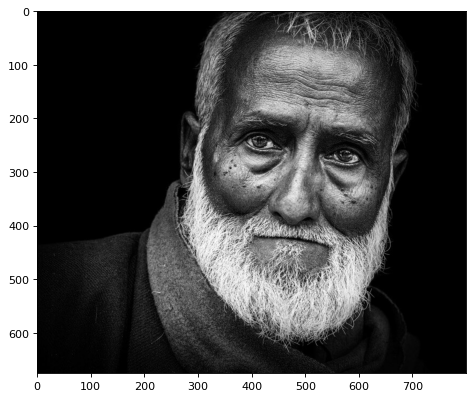

In [ ]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

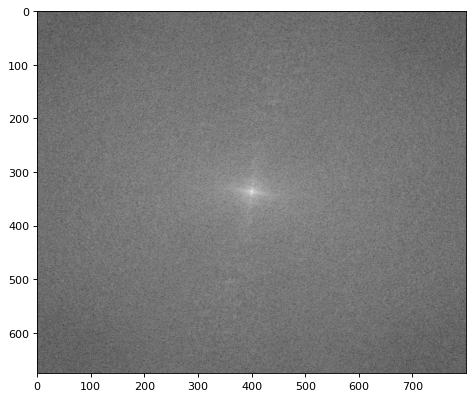

In [ ]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

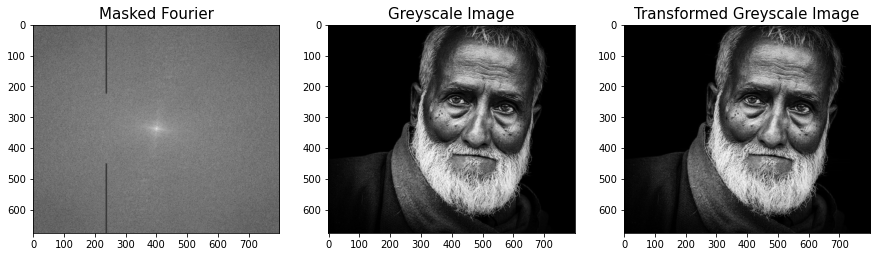

In [ ]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier =np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)),cmap='gray')
    ax[2].set_title('Transformed Greyscale Image',fontsize = f_size);


fourier_masker_ver(dark_image, 1)

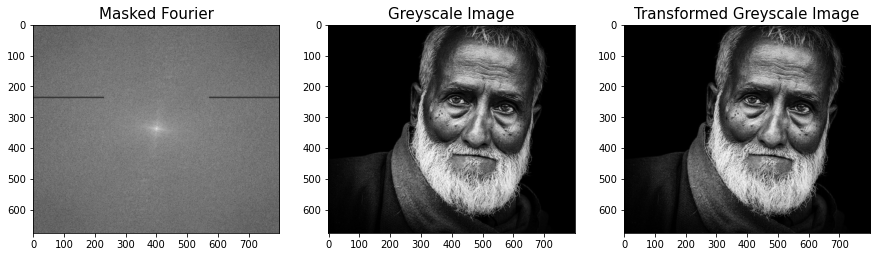

In [ ]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier =np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size);

fourier_masker_hor(dark_image, 1)

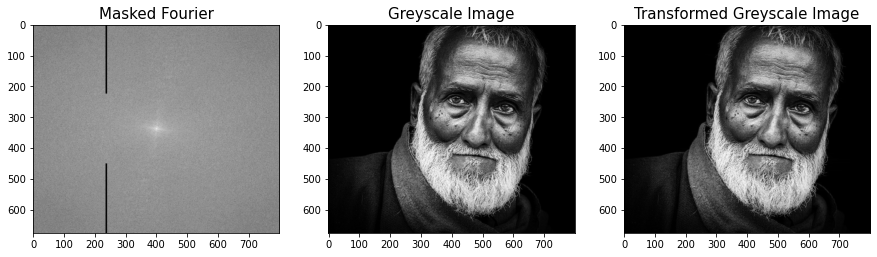

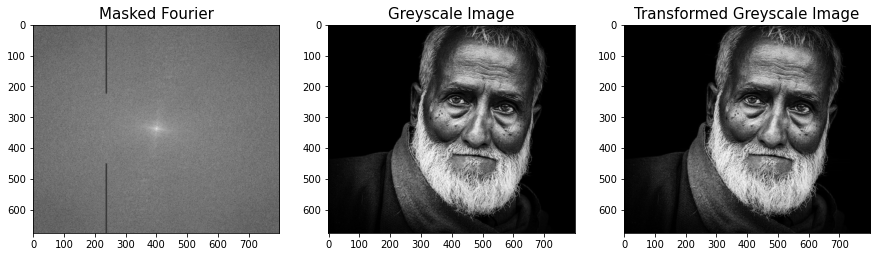

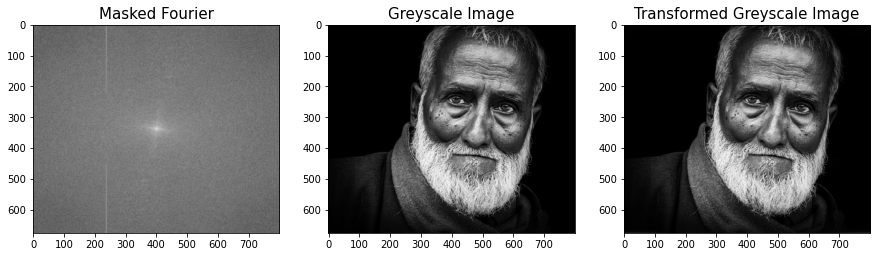

In [ ]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)
 
fourier_iterator(dark_image, [0.001, 1, 100])

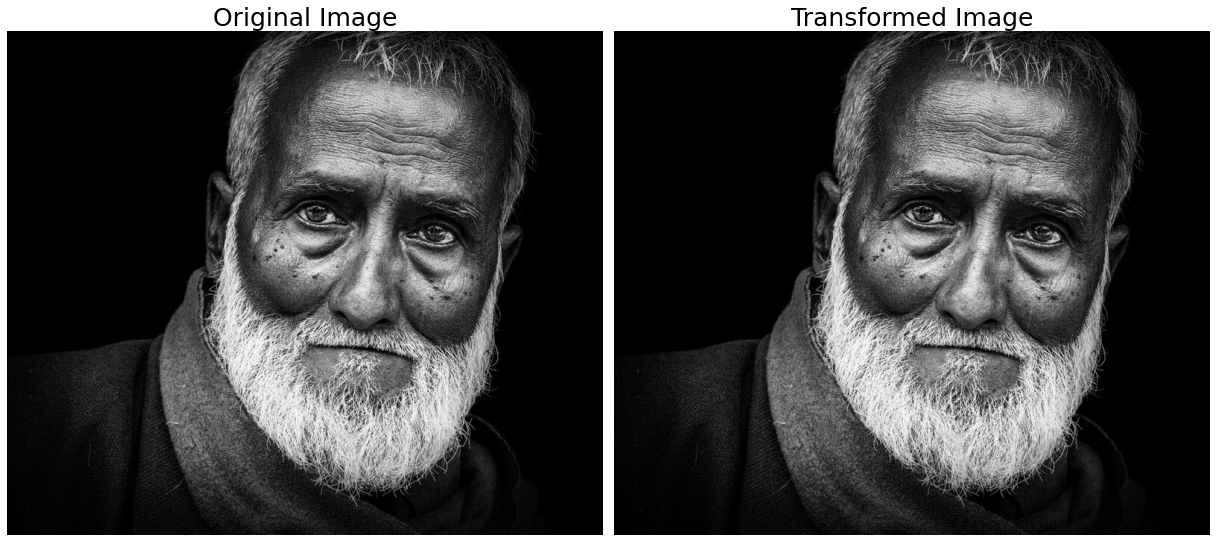

In [ ]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()


fourier_transform_rgb(dark_image)    

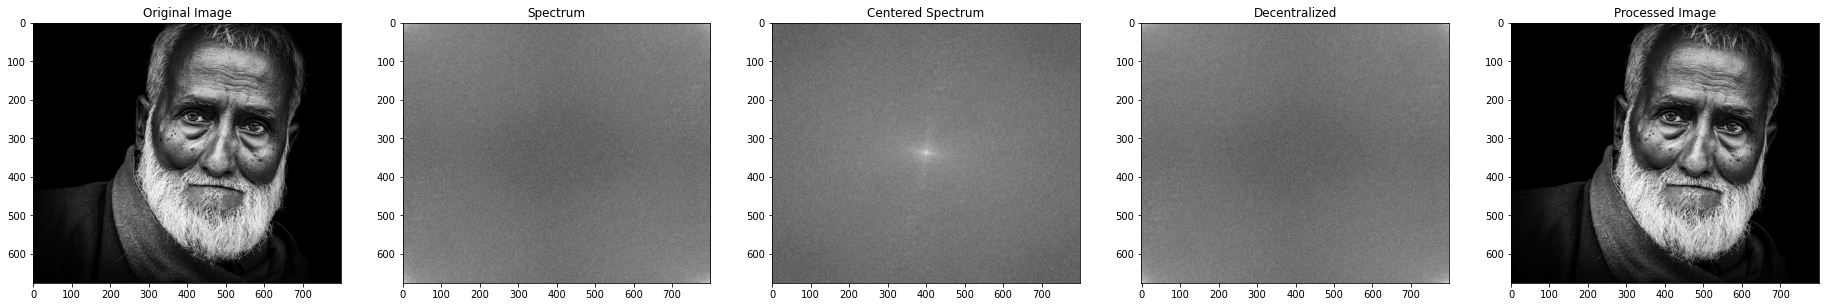

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("/content/drive/MyDrive/bw.jpg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

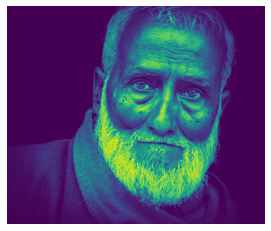

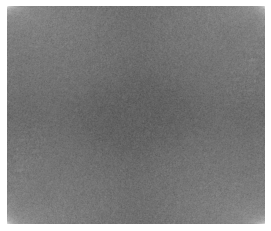

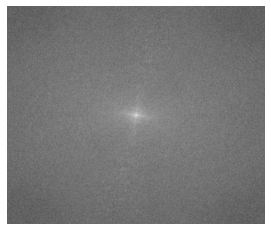

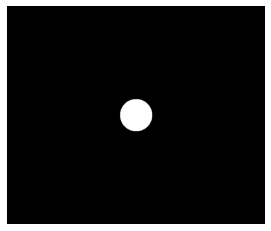

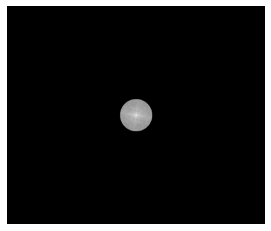

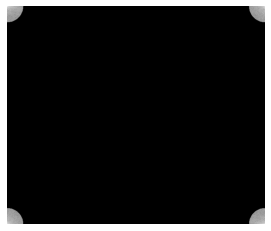

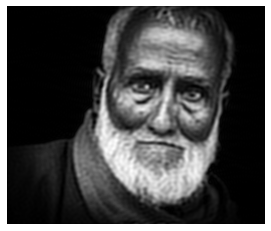

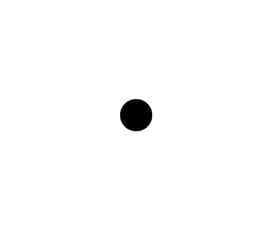

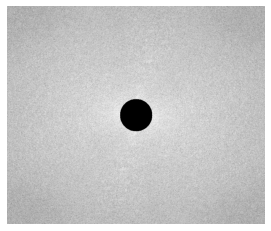

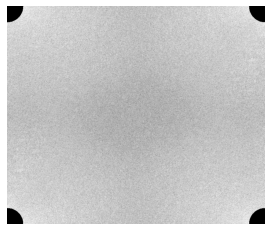

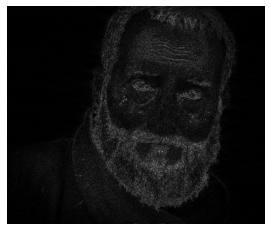

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
f = cv2.imread("/content/drive/MyDrive/bw.jpg",0)

# plt.imshow(f)
plt.imshow(f)
plt.axis('off')
plt.show()

# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()